In [100]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time
%matplotlib inline
import h5py
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import model_to_dot

import tensorflow as tf
tf.set_random_seed(1)

In [101]:
def create_datagens(img_width, img_height, batch_size, train_dir, valid_dir):
    # Data Generators
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    valid_datagen = ImageDataGenerator(
        rescale=1. / 255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size = batch_size)

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)
    
    return train_generator, valid_generator

In [113]:
# parameters
img_width = 150
img_height = 150

train_dir = '/Users/julia/Documents/MAS Data Science/CAS Machine Learning/Deep Learning/Exercises/DL_Project/clean/train/'
valid_dir = '/Users/julia/Documents/MAS Data Science/CAS Machine Learning/Deep Learning/Exercises/DL_Project/clean/valid/'
test_dir = '/Users/julia/Documents/MAS Data Science/CAS Machine Learning/Deep Learning/Exercises/DL_Project/clean/test/'

batch_size = 64
epochs = 20

n_train = len(os.listdir(train_dir))
n_valid = len(os.listdir(valid_dir))

# preprocessing
train_generator, valid_generator = create_datagens(img_width, img_height, batch_size, train_dir, valid_dir)

print(len(train_generator))

train_generator[1][0][0][0]
train_generator.class_indices
# train_generator.y

# network layout
# model, name = define_network(img_width, img_height)

Found 941 images belonging to 3 classes.
Found 164 images belonging to 3 classes.
15


{'Aussenansicht': 0, 'Grundriss': 1, 'Innenansicht': 2}

In [114]:
# def convertToOneHot(vector, num_classes=None):
#     result = np.zeros((len(vector), num_classes), dtype='int32')
#     result[np.arange(len(vector)), vector] = 1
#     return result

In [115]:
# Y_train=convertToOneHot(Y_train,num_classes=8)
# Y_valid=convertToOneHot(Y_valid,num_classes=8)

In [116]:
rmd=np.random.randint(0,len(train_generator))
plt.imshow(np.asarray(train_generator[rmd],dtype="uint8"),interpolation="bicubic")

ValueError: could not broadcast input array from shape (64,150,150,3) into shape (64)

In [ ]:
### Define the network

In [117]:
# X_mean = np.mean( X_train, axis = 0)
# X_std = np.std( X_train, axis = 0)

# X_train = (X_train - X_mean ) / (X_std + 0.0001)
# X_valid = (X_valid - X_mean ) / (X_std + 0.0001)

In [118]:
model = Sequential()
name = 'cnn_wohnungsbilder'

model.add(Convolution2D(15, (5, 5),padding='same',input_shape=(img_width,img_height,3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(15, (5,5),padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(30, (5,5),padding='same'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Convolution2D(30, (5,5),padding='same'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Convolution2D(30, (3,3),padding='same'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Convolution2D(30, (3,3),padding='same'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Convolution2D(30, (3,3),padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Flatten())
model.add(Dense(300))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 150, 150, 15)      1140      
_________________________________________________________________
activation_59 (Activation)   (None, 150, 150, 15)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 150, 150, 15)      5640      
_________________________________________________________________
activation_60 (Activation)   (None, 150, 150, 15)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 75, 75, 15)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 75, 75, 30)        11280     
_________________________________________________________________
dropout_18 (Dropout)         (None, 75, 75, 30)        0         
__________

In [120]:
# setup tensorboard
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/' + name + '/', 
        write_graph=True,
        histogram_freq=0)

#save model after every 10 epochs 
savedir = "checkpoints/"+name+"/"
os.makedirs(savedir,exist_ok=True)       
checkpointer = keras.callbacks.ModelCheckpoint( 
        filepath =  savedir+"weights_epoch_{epoch:03d}-{val_loss:.2f}.hdf5",
        verbose = 1, 
        save_best_only = False,
        period = 10 )

In [121]:
# run training
history = model.fit_generator(
    generator=train_generator,
    epochs=epochs,
    validation_data=valid_generator)

Epoch 1/20
15/15 [==============================] - 11311s 754s/step - loss: 0.8335 - acc: 0.6319 - val_loss: 1.0976 - val_acc: 0.4573
Epoch 2/20
15/15 [==============================] - 202s 13s/step - loss: 0.4229 - acc: 0.8717 - val_loss: 1.5234 - val_acc: 0.5183
Epoch 3/20
15/15 [==============================] - 203s 14s/step - loss: 0.4083 - acc: 0.8592 - val_loss: 1.3911 - val_acc: 0.6098
Epoch 4/20
15/15 [==============================] - 202s 13s/step - loss: 0.3838 - acc: 0.8809 - val_loss: 1.2034 - val_acc: 0.6220
Epoch 5/20
15/15 [==============================] - 624s 42s/step - loss: 0.3301 - acc: 0.8945 - val_loss: 1.6395 - val_acc: 0.4817
Epoch 6/20
15/15 [==============================] - 230s 15s/step - loss: 0.3406 - acc: 0.8790 - val_loss: 1.7277 - val_acc: 0.4573
Epoch 7/20
15/15 [==============================] - 234s 16s/step - loss: 0.3576 - acc: 0.8780 - val_loss: 1.4108 - val_acc: 0.5427
Epoch 8/20
15/15 [==============================] - 235s 16s/step - loss:

In [66]:
model.evaluate(X_train,Y_train)

NameError: name 'X_train' is not defined

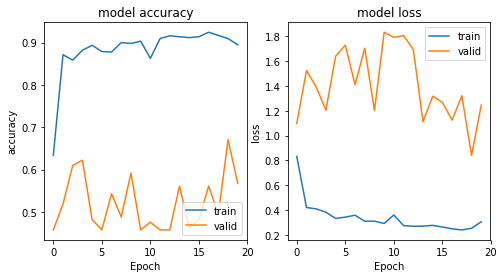

In [122]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="upper right")
plt.show()